### **Training A Perceptron**

Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Defining a Perceptron class

In [ ]:
class Perceptron():

    def __init__(self):
        self.weights = []
        
    def fit(self, X, y, learning_rate = 0.01, num_iteration = 100):
        
        (num_row, num_feature) = X.shape
        
        # Randomly initalize the weights
        self.weights = np.random.rand(num_feature+1) 

        # Launch the training algorithm
        for i in range(num_iteration):
            
            # Stochastic Gradient Descent
            r_i = random.randint(0, num_row-1)
            row = X[r_i,:] # take the random sample from the dataset
            yhat = self.predict(row)
            error = (y[r_i] - yhat) # estimate of the gradient
            self.weights[0] = self.weights[0] + learning_rate*error*1 # first weight one is the bias

            # Update all parameters after bias
            for f_i in range(num_feature):
                self.weights[f_i] = self.weights[f_i] + learning_rate*error*row[f_i]
                
            if i % 500 == 0:
            #For visualizing the line every 500 steps  
              if num_feature == 2:
                w1 = self.weights[1]
                w2 = self.weights[2]
                b = self.weights[0]
                x2 = np.linspace(-25, 25, 50)
                y2 = [-1*((w1*i) + b)/w2 for i in x2]
                plt.plot(x2, y2)
                plt.ylim(-25, 25)
                #plt.plot(X[:,0], X[:, 1], '.')
                #plt.show()
              
              total_error = 0
              for r_i in range(num_row):
                  row = X[r_i,:]
                  yhat = self.predict(row)
                  error = (y[r_i] - yhat)
                  total_error = total_error + error**2
              mean_error = total_error/num_row
              print(f"Iteration {i} with error = {mean_error}")
            
    def predict(self, row):
            
        # The activation start with the bias at weights == 0
        activation = self.weights[0]
        
        # We iterate over the weights and the features in the given row
        for weight, feature in zip(self.weights[1:], row):
            activation = activation + weight*feature
            
        #Step Function Activation
        if activation >= 0.0:
            return 1.0
        return 0.0

Let's Create Some Data!

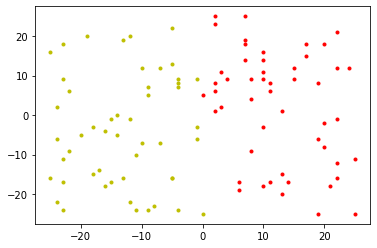

In [ ]:
# Training Data 0, 50
random.seed(50)
data = [[], [], [], []]
for j in range(4):
  if(j==0):
    data[j] = [random.randint(0, 25) for n in range(50)]
  elif (j==2):
    data[j] = [random.randint(-25, 0) for n in range(50)]
  else:
    data[j] = [random.randint(-25, 25) for n in range(50)]
X = []

for i in range(50):
  X.append([data[0][i], data[1][i], 1])
  X.append([data[2][i], data[3][i], 0])

random.shuffle(X)
X = np.array(X)
y = X[:, 2]
[x1, y1, x2, y2] = [np.array(p) for p in data]

plt.plot(x1, y1, 'r.')
plt.plot(x2, y2, 'y.')
plt.show()

#print(X[:, 0:2])
#print(y)

Finally, some results

Iteration 0 with error = 0.25
Iteration 500 with error = 0.04
Iteration 1000 with error = 0.04
Iteration 1500 with error = 0.04
Iteration 2000 with error = 0.03
Iteration 2500 with error = 0.02
Iteration 3000 with error = 0.01
Iteration 3500 with error = 0.01
Iteration 4000 with error = 0.01
Iteration 4500 with error = 0.01
Iteration 5000 with error = 0.01
Iteration 5500 with error = 0.01
Iteration 6000 with error = 0.01
Iteration 6500 with error = 0.01
Iteration 7000 with error = 0.01
Iteration 7500 with error = 0.01
Iteration 8000 with error = 0.01
Iteration 8500 with error = 0.01
Iteration 9000 with error = 0.01
Iteration 9500 with error = 0.01


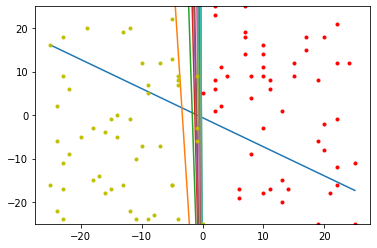

In [ ]:
pcp = Perceptron()
pcp.fit(X[:, 0:2] ,y, learning_rate = 0.1, num_iteration = 10000)

plt.plot(x1, y1, 'r.')
plt.plot(x2, y2, 'y.')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

import numpy as np
import math
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
diabetes = datasets.load_diabetes()
X,Y = diabetes.data,diabetes.target


x_in,x_test, y_out , y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 1234)
sc = StandardScaler()
x_in = sc.fit_transform(x_in)

x_in = torch.from_numpy(x_in.astype(np.float32))
y_out = torch.from_numpy(y_out.astype(np.float32))
print(y_out.shape)
print(x_in.shape)


no_of_epochs = 1000
learning_rate = 3e-4

x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

torch.Size([353])
torch.Size([353, 10])


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 10, bias = True)
        self.fc2 = nn.Linear(10, 10, bias = True)
        self.fc3 = nn.Linear(10, 1, bias = True)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

Gradient Descent:

Error before training : 29246.08984375


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Error after training : 6028.83203125


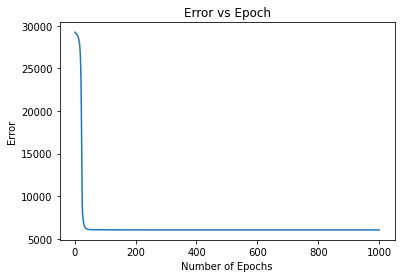

In [ ]:
x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

model = Net()

loss_function = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

pred = model(x_in)

pred = torch.flatten(pred)



loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for i in range(no_of_epochs):
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Error before training : 29179.740234375
Error after training : 6028.720703125


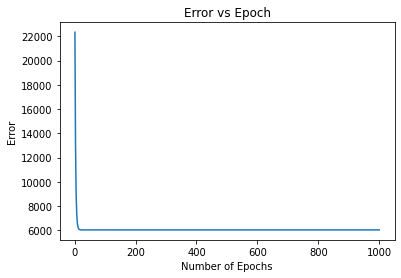

In [ ]:
model = Net()

no_of_epochs = 1000

x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

loss_function = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

batch_size = 1
n_batches = int(len(x_in) / batch_size)

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for epoch in range(no_of_epochs):
    for batch in range(n_batches):
        batch_X, batch_y = x_in[batch*batch_size:(batch+1)*batch_size,], y_out[batch*batch_size:(batch+1)*batch_size,]
        pred = model(batch_X)
        loss = loss_function(pred, batch_y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()

Mini Batch Gradient Descent: 

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Error before training : 29134.841796875
Error after training : 6251.7685546875


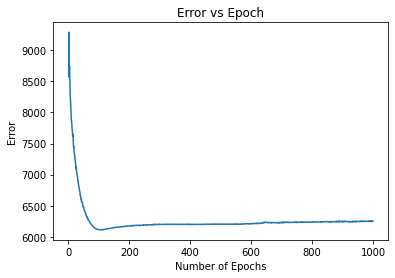

In [ ]:
no_of_epochs = 1000

x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

model = Net()

loss_function = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

batch_size = 16
n_batches = int(len(x_in) / batch_size)

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for epoch in range(no_of_epochs):
    for batch in range(n_batches):
        batch_X, batch_y = x_in[batch*batch_size:(batch+1)*batch_size,], y_out[batch*batch_size:(batch+1)*batch_size,]
        pred = model(batch_X)
        loss = loss_function(pred, batch_y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()

SGD with momentum:

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Error before training : 29322.392578125
Error after training : 6062.55419921875


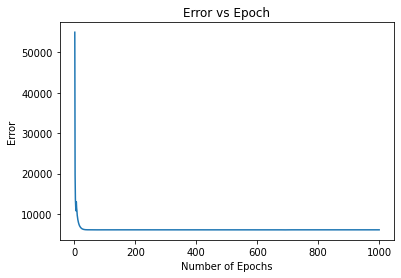

In [ ]:
no_of_epochs = 1000

x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

model = Net()

loss_function = nn.MSELoss() 
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

batch_size = 16
n_batches = int(len(x_in) / batch_size)

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for epoch in range(no_of_epochs):
    for batch in range(n_batches):
        batch_X, batch_y = x_in[batch*batch_size:(batch+1)*batch_size,], y_out[batch*batch_size:(batch+1)*batch_size,]
        pred = model(batch_X)
        loss = loss_function(pred, batch_y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()

RMSprop:

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Error before training : 29177.888671875
Error after training : 6091.81103515625


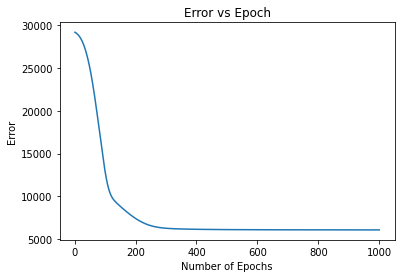

In [ ]:
x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

model = Net()

loss_function = nn.MSELoss()
optimiser = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9, eps = 1e-7)

batch_size = 16
n_batches = int(len(x_in) / batch_size)

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for epoch in range(no_of_epochs):
    for batch in range(n_batches):
        batch_X, batch_y = x_in[batch*batch_size:(batch+1)*batch_size,], y_out[batch*batch_size:(batch+1)*batch_size,]
        pred = model(batch_X)
        loss = loss_function(pred, batch_y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()

Adagrad:

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Error before training : 29179.17578125
Error after training : 28953.17578125


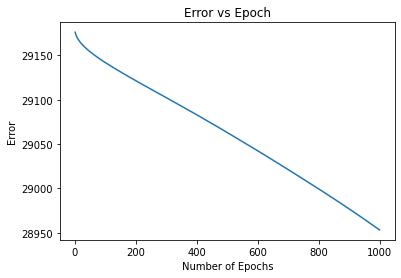

In [ ]:
x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

model = Net()

loss_function = nn.MSELoss()
optimiser = torch.optim.Adagrad(model.parameters(), lr = learning_rate, eps = 1e-7)

batch_size = 16
n_batches = int(len(x_in) / batch_size)

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for epoch in range(no_of_epochs):
    for batch in range(n_batches):
        batch_X, batch_y = x_in[batch*batch_size:(batch+1)*batch_size,], y_out[batch*batch_size:(batch+1)*batch_size,]
        pred = model(batch_X)
        loss = loss_function(pred, batch_y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()

Adadelta:

In [ ]:
no_of_epochs = 1000

x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

model = Net()

loss_function = nn.MSELoss()
optimiser = torch.optim.Adadelta(model.parameters(), lr = learning_rate, rho = 0.9, eps = 1e-7)

batch_size = 16
n_batches = int(len(x_in) / batch_size)

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for epoch in range(no_of_epochs):
    for batch in range(n_batches):
        batch_X, batch_y = x_in[batch*batch_size:(batch+1)*batch_size,], y_out[batch*batch_size:(batch+1)*batch_size,]
        pred = model(batch_X)
        loss = loss_function(pred, batch_y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()

Adam:

In [ ]:
no_of_epochs = 1000

x_plot = np.arange(1, no_of_epochs + 1)
y_plot = []

model = Net()

loss_function = nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

batch_size = 16
n_batches = int(len(x_in) / batch_size)

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error before training :", loss.item())

for epoch in range(no_of_epochs):
    for batch in range(n_batches):
        batch_X, batch_y = x_in[batch*batch_size:(batch+1)*batch_size,], y_out[batch*batch_size:(batch+1)*batch_size,]
        pred = model(batch_X)
        loss = loss_function(pred, batch_y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    pred = model(x_in)
    loss = loss_function(pred, y_out)
    y_plot.append(loss.item())

pred = model(x_in)
loss = loss_function(pred, y_out)
print("Error after training :", loss.item())

y_plot = np.array(y_plot)
plt.plot(x_plot,y_plot)
plt.title("Error vs Epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.show()